In [2]:
import pandas as pd
import numpy as np
import glob
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
#Use glob to match the pattern ‘csv’
#read file
from google.colab import drive
drive.mount('/content/drive')
df_tweets = pd.read_csv("/content/drive/MyDrive/tweets/World Cup 2022 Influencer Tweets.csv")
#display the first 5 tweets
df_tweets.head(5)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Mounted at /content/drive


,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source
0,FIFA World Cup,NaN,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 16:02:30+00:00,The greatest final ever. \n\n#FIFAWorldCup | #...,Twitter for Advertisers
1,beIN SPORTS,MENA,2012-05-10 13:45:16+00:00,1440770,5828,True,2023-01-18 15:39:50+00:00,🗓️🏆\n\nOne month on from a truly 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚...,Twitter Web App
2,FIFA World Cup,NaN,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 11:30:30+00:00,"“Argentine Gold!” 🫶\n\nA month ago today, Ange...",Twitter for Advertisers
3,Road to 2022,NaN,2016-02-29 12:02:29+00:00,1296410,877,True,2023-01-17 12:16:17+00:00,The #Qatar2022 Podium: \n\n🥇 @Argentina \n🥈 @F...,Twitter for iPhone
4,Road to 2022,NaN,2016-02-29 12:02:29+00:00,1298433,877,True,2023-01-17 12:16:17+00:00,The #Qatar2022 Podium: \n\n🥇 @Argentina \n🥈 @F...,Twitter for iPhone


In [3]:
df_tweets.shape

(988, 9)

In [4]:
df_tweets.duplicated(subset=['text']).sum()
#clear duplicates
df_tweets=df_tweets.drop_duplicates(subset=['text'])
#replace all NaN values wit an empty string
df_tweets = df_tweets.replace(np.nan, '')
df_tweets.shape

(987, 9)

In [5]:
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in df_tweets dataframe
df_tweets['text'] = df_tweets['text'].apply(lambda x:tweet_cleaner(x))
df_tweets.shape

(987, 9)

In [6]:
#downloading the vader lexicon from nltk
!pip install vaderSentiment
!pip install twython
nltk.download('vader_lexicon')#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
df_tweets['scores'] = df_tweets['text'].apply(lambda text: sid.polarity_scores(text))
df_tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores
0,FIFA World Cup,,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 16:02:30+00:00,The greatest final ever. #FIFAWorldCup | #Qata...,Twitter for Advertisers,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp..."
1,beIN SPORTS,MENA,2012-05-10 13:45:16+00:00,1440770,5828,True,2023-01-18 15:39:50+00:00,🗓️🏆 One month on from a truly 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚 FI...,Twitter Web App,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp..."
2,FIFA World Cup,,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 11:30:30+00:00,"“Argentine Gold!” 🫶 A month ago today, Angel D...",Twitter for Advertisers,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Road to 2022,,2016-02-29 12:02:29+00:00,1296410,877,True,2023-01-17 12:16:17+00:00,The #Qatar2022 Podium: 🥇 🥈 🥉,Twitter for iPhone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,FIFA World Cup,,2010-04-29 10:58:07+00:00,12326652,2227,True,2023-01-16 21:07:11+00:00,Another step forward at #Qatar2022 🏴󠁧󠁢󠁥󠁮󠁧󠁿 Gar...,Twitter for Advertisers,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [8]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
      return "Positive"
    elif sentiment['compound'] <= -0.05: 
      return "Negative"
    else:
      return "Neutral"
final_df = df_tweets
df_tweets['sentiment'] = final_df['scores'].apply(lambda x: sentimentPredict(x))
df_tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
0,FIFA World Cup,,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 16:02:30+00:00,The greatest final ever. #FIFAWorldCup | #Qata...,Twitter for Advertisers,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",Positive
1,beIN SPORTS,MENA,2012-05-10 13:45:16+00:00,1440770,5828,True,2023-01-18 15:39:50+00:00,🗓️🏆 One month on from a truly 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚 FI...,Twitter Web App,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...",Positive
2,FIFA World Cup,,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 11:30:30+00:00,"“Argentine Gold!” 🫶 A month ago today, Angel D...",Twitter for Advertisers,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,Road to 2022,,2016-02-29 12:02:29+00:00,1296410,877,True,2023-01-17 12:16:17+00:00,The #Qatar2022 Podium: 🥇 🥈 🥉,Twitter for iPhone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
5,FIFA World Cup,,2010-04-29 10:58:07+00:00,12326652,2227,True,2023-01-16 21:07:11+00:00,Another step forward at #Qatar2022 🏴󠁧󠁢󠁥󠁮󠁧󠁿 Gar...,Twitter for Advertisers,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


(-0.5, 399.5, 199.5, -0.5)

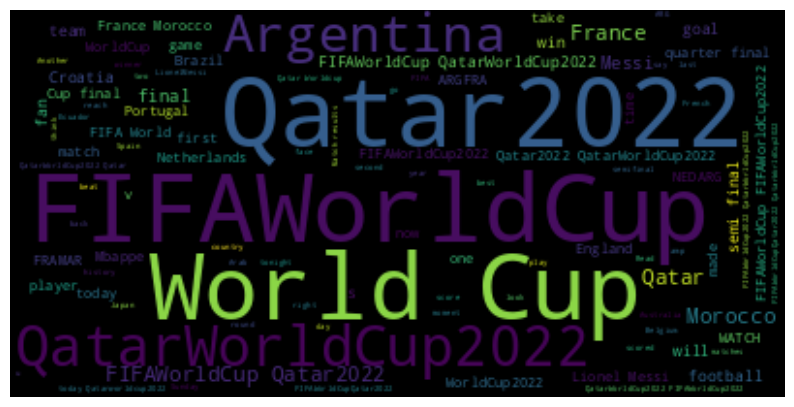

In [9]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

tweet_All = " ".join(review for review in df_tweets.text)


fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

REMOVING PUNCTUATIONS AND MAKING TEXT LOWERCASE

In [10]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
df_tweets['text'] = df_tweets['text'].apply(lambda x:clean_text(x))
df_tweets['text']

0        the greatest final ever fifaworldcup  qatar2022
1      🗓️🏆 one month on from a truly 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚 fi...
2      “argentine gold” 🫶 a month ago today angel di ...
3                             the qatar2022 podium 🥇 🥈 🥉
5      another step forward at qatar2022 🏴󠁧󠁢󠁥󠁮󠁧󠁿 gare...
                             ...                        
983    qatar had to swallow a 20 defeat to ecuador in...
984    so ecuador won 20 against qatar despite the br...
985    brilliant game ecuador 🇪🇨 very well deserving ...
986    breaking ecuador marks the first victory of qa...
987    video saudi crown prince mohammed bin salman s...
Name: text, Length: 987, dtype: object

STEMMING AND LEMMATIZATION

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
df=pd.DataFrame()
df['text']=df_tweets['text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
df.head()

,text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized
0,the greatest final ever fifaworldcup qatar2022,"[the, greatest, final, ever, fifaworldcup, qat...","[greatest, final, ever, fifaworldcup, qatar2022]","[greatest, final, ever, fifaworldcup, qatar2022]","[greatest, final, ever, fifaworldcup, qatar2022]","[greatest, final, ever, fifaworldcup, qatar2022]"
1,🗓️🏆 one month on from a truly 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚 fi...,"[, one, month, on, from, a, truly, 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗...","[, one, month, truly, 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚, fifa, wor...","[, one, month, truli, 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚, fifa, wor...","[, one, month, truli, 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚, fifa, wor...","[, one, month, truly, 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚, fifa, wor..."
2,“argentine gold” 🫶 a month ago today angel di ...,"[, argentine, gold, a, month, ago, today, ange...","[, argentine, gold, month, ago, today, angel, ...","[, argentin, gold, month, ago, today, angel, d...","[, argentin, gold, month, ago, today, angel, d...","[, argentine, gold, month, ago, today, angel, ..."
3,the qatar2022 podium 🥇 🥈 🥉,"[the, qatar2022, podium, ]","[qatar2022, podium, ]","[qatar2022, podium, ]","[qatar2022, podium, ]","[qatar2022, podium, ]"
5,another step forward at qatar2022 🏴󠁧󠁢󠁥󠁮󠁧󠁿 gare...,"[another, step, forward, at, qatar2022, gareth...","[another, step, forward, qatar2022, gareth, so...","[anoth, step, forward, qatar2022, gareth, sout...","[anoth, step, forward, qatar2022, gareth, sout...","[another, step, forward, qatar2022, gareth, so..."


In [13]:
df_tweets['text']=df['lemmatized']
df_tweets.head()

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
0,FIFA World Cup,,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 16:02:30+00:00,"[greatest, final, ever, fifaworldcup, qatar2022]",Twitter for Advertisers,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",Positive
1,beIN SPORTS,MENA,2012-05-10 13:45:16+00:00,1440770,5828,True,2023-01-18 15:39:50+00:00,"[, one, month, truly, 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚, fifa, wor...",Twitter Web App,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...",Positive
2,FIFA World Cup,,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 11:30:30+00:00,"[, argentine, gold, month, ago, today, angel, ...",Twitter for Advertisers,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,Road to 2022,,2016-02-29 12:02:29+00:00,1296410,877,True,2023-01-17 12:16:17+00:00,"[qatar2022, podium, ]",Twitter for iPhone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
5,FIFA World Cup,,2010-04-29 10:58:07+00:00,12326652,2227,True,2023-01-16 21:07:11+00:00,"[another, step, forward, qatar2022, gareth, so...",Twitter for Advertisers,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


sentiment count

In [14]:
temp = df_tweets.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
2,Positive,462
1,Neutral,396
0,Negative,129


FUNNEL CHART FOR BETTER VISUALIZATION OF SENTIMENT DISTRIBUTION

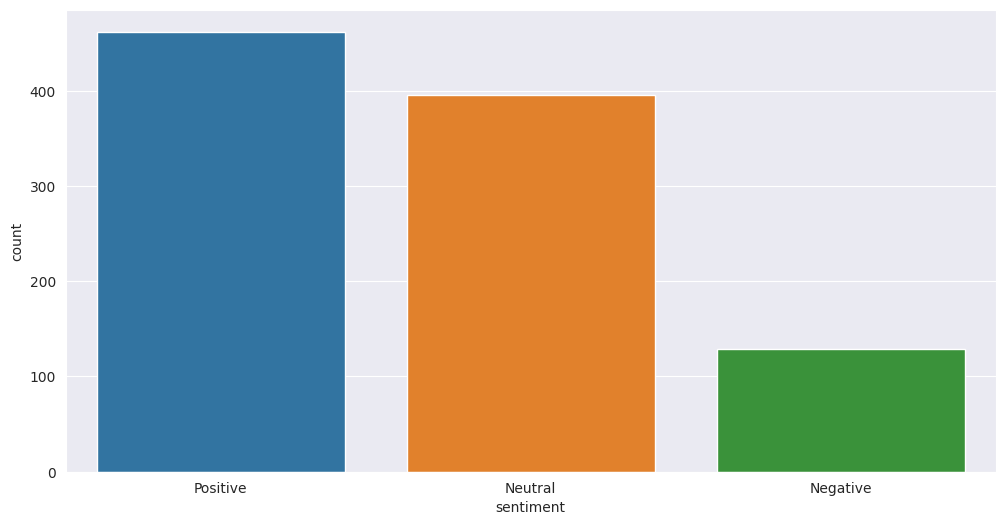

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_tweets)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [16]:
Positive_tweet = df_tweets[df_tweets['sentiment']=='Positive'].reset_index()
Negative_tweet = df_tweets[df_tweets['sentiment']=='Negative'].reset_index()
Neutral_tweet = df_tweets[df_tweets['sentiment']=='Neutral'].reset_index()

In [17]:
all_positive_words=[]
for i in range(len(Positive_tweet['text'])):
    a=Positive_tweet['text'][i]
    for i in a:
        all_positive_words.append(i)
all_positive_words=pd.Series(np.array(all_positive_words))
common_words=all_positive_words.value_counts().drop(labels='')[:70].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='70 Most Common Words In Positive Tweets')
fig.show()

In [18]:
all_negative_words=[]
for i in range(len(Negative_tweet['text'])):
    a=Negative_tweet['text'][i]
    for i in a:
        all_negative_words.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
common_words=all_negative_words.value_counts().drop(labels='')[:70].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets')
fig.show()

In [19]:
all_neutral_words=[]
for i in range(len(Neutral_tweet['text'])):
    a=Neutral_tweet['text'][i]
    for i in a:
        all_neutral_words.append(i)
all_neutral_words=pd.Series(np.array(all_neutral_words))
common_words=all_neutral_words.value_counts().drop(labels='')[:70].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='70 Most Common Words In Neutral Tweets')
fig.show()

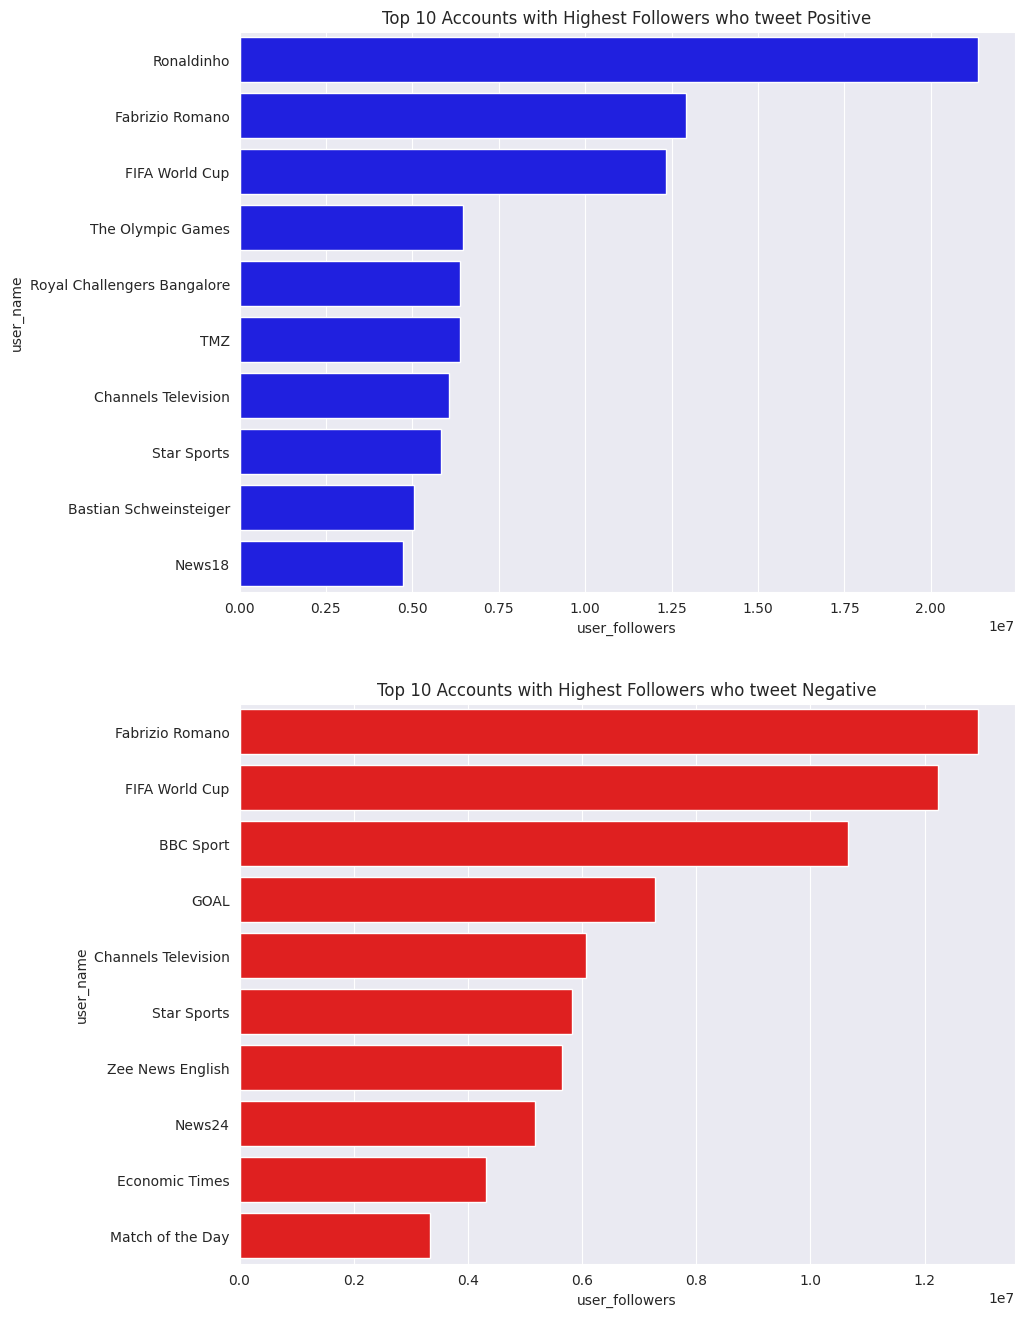

In [20]:
from matplotlib import rcParams

fig, (ax1, ax3) = plt.subplots(2,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=df_tweets[(df_tweets.sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')

sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=df_tweets[(df_tweets.sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

fig.show()